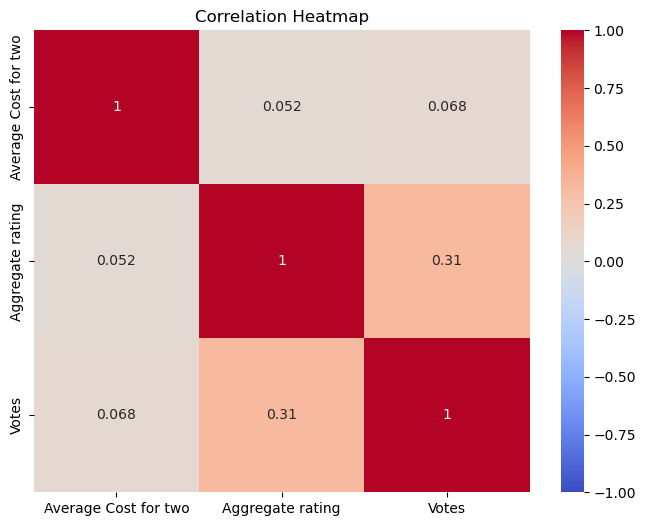

In [7]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import base64


df = pd.read_csv('Dataset .csv')  # Load your dataset

# Create your visualizations

# Example histogram for ratings distribution
def plot_histogram():
    fig = px.histogram(df, x='Aggregate rating', nbins=20, title='Distribution of Ratings')
    fig.update_layout(xaxis_title='Rating', yaxis_title='Frequency')
    return fig

# Example boxplot for ratings distribution
def plot_boxplot():
    fig = px.box(df, y='Aggregate rating', title='Boxplot of Ratings')
    fig.update_layout(yaxis_title='Rating')
    return fig

# Average Rating by Cuisine
def plot_cuisine_rating():
    cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
    cuisine_rating_sorted = cuisine_rating.sort_values(by='Aggregate rating', ascending=False).head(20)
    fig = px.bar(cuisine_rating_sorted, x='Aggregate rating', y='Cuisines', orientation='h', 
                 title='Top 20 Cuisines by Average Rating')
    fig.update_layout(xaxis_title='Average Rating', yaxis_title='Cuisine')
    return fig

# Average Rating by City
def plot_city_rating():
    city_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()
    city_rating_sorted = city_rating.sort_values(by='Aggregate rating', ascending=False).head(20)
    fig = px.bar(city_rating_sorted, x='Aggregate rating', y='City', orientation='h', 
                 title='Top 20 Cities by Average Rating')
    fig.update_layout(xaxis_title='Average Rating', yaxis_title='City')
    return fig

# Scatter plot of Rating vs Average Cost
def plot_scatter_cost_rating():
    fig = px.scatter(df, x='Average Cost for two', y='Aggregate rating', 
                     title='Rating vs Average Cost for Two')
    fig.update_layout(xaxis_title='Average Cost for Two', yaxis_title='Rating')
    return fig

# Correlation Heatmap (converted to an image for Dash)
def plot_heatmap():
    corr_matrix = df[['Average Cost for two', 'Aggregate rating', 'Votes']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    # Save the plot to a PNG image and encode it as base64
    buf = io.BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return img_str

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Restaurant Data Dashboard', style={'textAlign': 'center'}),
    
    html.Div(children='Visualizations of Ratings, Cuisines, Cities, and More!', 
             style={'textAlign': 'center'}),
    
    # Distribution of Ratings
    dcc.Graph(figure=plot_histogram()),
    
    # Boxplot of Ratings Distribution
    dcc.Graph(figure=plot_boxplot()),
    
    # Average Rating by Cuisine
    dcc.Graph(figure=plot_cuisine_rating()),
    
    # Average Rating by City
    dcc.Graph(figure=plot_city_rating()),
    
    # Scatter plot: Rating vs Average Cost
    dcc.Graph(figure=plot_scatter_cost_rating()),
    
    # Correlation Heatmap (image)
    html.Div(children=[
        html.H3('Correlation Heatmap', style={'textAlign': 'center'}),
        html.Img(src='data:image/png;base64,{}'.format(plot_heatmap()), style={'width': '100%'})
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
